In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
akhilkasare_covid19_chest_xray_detection_path = kagglehub.dataset_download('akhilkasare/covid19-chest-xray-detection')

print('Data source import complete.')


100%|██████████| 136M/136M [00:02<00:00, 64.4MB/s]

Extracting files...


Data source import complete.


In [2]:
print(akhilkasare_covid19_chest_xray_detection_path)

/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Test/non_covid/patient00826-study1-view1_frontal.jpg
/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Test/non_covid/patient00410-study4-view1_frontal.jpg
/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Test/non_covid/patient00827-study1-view1_frontal.jpg
/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Test/non_covid/patient00542-study4-view1_frontal.jpg
/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Test/non_covid/patient00150-study2-view1_frontal.jpg
/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Test/non_covid/patient00950-study1-view1_frontal.jpg
/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Tes

In [4]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [5]:
iIMAGE_SIZE = [224, 224]

base_path = '/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update'

train_path = os.path.join(base_path, 'Train')
test_path = os.path.join(base_path, 'Test')
import os

print("Train path exists:", os.path.exists(train_path))  # should be True
print("Test path exists:", os.path.exists(test_path))

Train path exists: True
Test path exists: True


In [22]:
#Declaring the image size and the train, test path of the dataset
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = '/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Train'
test_path = '/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Test'


In this we will be using ResNet-50 Pretrained Moldel

In [7]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
#Now we dont have to train the existing weights we just have to train our last layer.
for layer in resnet.layers:
  layer.trainable = False

In [9]:
#By using the Glob function we will be able to know our output classes.
from glob import glob

folder = glob('/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/*')
print(folder)

['/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Test', '/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Train']


In [10]:
len(folder)

2

In [11]:
#Now the next we need to Flatten our ResNet model.
#What is Flattening of layer, why is it required?
###We need to convert our 2D features to 1D features. Flatting is required when we have to convert our layer to a fully connected layer.

x = Flatten()(resnet.output)

In [12]:
#Adding our last laye
prediction = Dense(2, activation='softmax')(x)

In [17]:
model = Model(inputs = resnet.inputs, outputs = prediction)

In [18]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,788,418 (90.75 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [19]:
#Compiling our model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

The Data Augmentation

In [20]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
# flow_from_directory means i am applying all the train_datagen techniques to all the images
# We need to provide the same traget_size as initialized in the IMAGE_SIZE
# If you have more than two classes we should use class_mode = categorical
# But if we have just two classses we can use class_mode = binary

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

Found 453 images belonging to 2 classes.


In [24]:
# Applying the same techniques on the test dataset

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 219 images belonging to 2 classes.


In [25]:
EarlyStopping = EarlyStopping(monitor='val_loss', patience=5 , mode='min', verbose=1)

In [26]:
history = model.fit(train_set, validation_data=test_set, epochs=50, steps_per_epoch=len(train_set), validation_steps=len(test_set), callbacks=EarlyStopping)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


15/15 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.5029 - loss: 2.0990 - val_accuracy: 0.7169 - val_loss: 0.5629
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 138s 9s/step - accuracy: 0.6856 - loss: 0.6217 - val_accuracy: 0.7580 - val_loss: 0.5150
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 127s 9s/step - accuracy: 0.8194 - loss: 0.4271 - val_accuracy: 0.6438 - val_loss: 0.7071
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 129s 9s/step - accuracy: 0.7635 - loss: 0.5176 - val_accuracy: 0.7991 - val_loss: 0.4585
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.8636 - loss: 0.3101 - val_accuracy: 0.7991 - val_loss: 0.4502
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.9091 - loss: 0.2591 - val_accuracy: 0.8037 - val_loss: 0.4269
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.9298 - loss: 0.2555 - val_accuracy: 0.7991 - val_loss: 0.4314
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 129s 9s/step - accuracy: 0.9195 - loss: 0.2176 - val_accuracy: 0.7215 - val_loss: 0.

In [27]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

Final Training Accuracy: 0.9007
Final Validation Accuracy: 0.7945


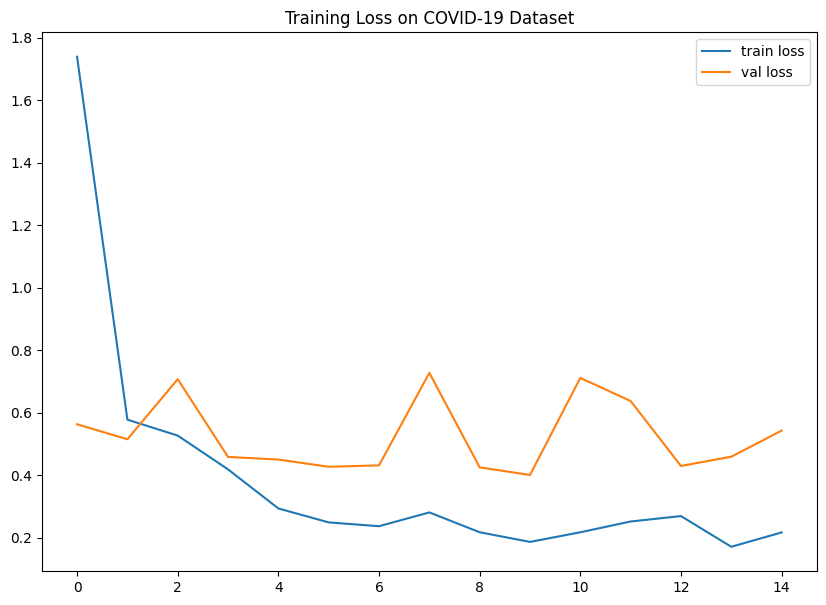

In [28]:
#Plotting the losses and Accuracy on the dataset

plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Training Loss on COVID-19 Dataset")
plt.legend()
plt.show()

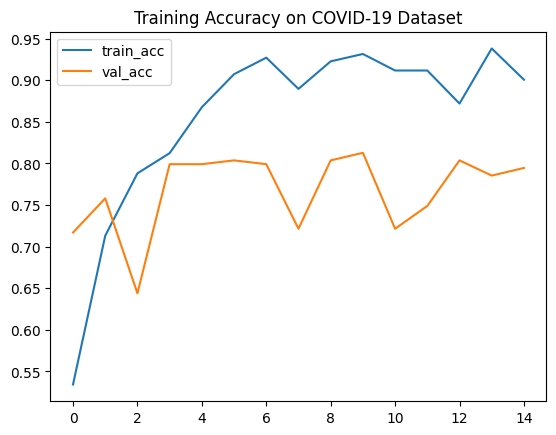

<Figure size 640x480 with 0 Axes>

In [29]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training Accuracy on COVID-19 Dataset")
plt.legend()
plt.show()
plt.savefig('lossval_loss')

In [30]:
#Saving the h5 file
from tensorflow.keras.models import load_model

model.save('covid_chest_xray_model.h5')


Predicting our model

In [31]:
pred = model.predict(test_set)
pred


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step


array([[4.48280126e-01, 5.51719904e-01],
       [5.20514441e-05, 9.99947846e-01],
       [4.87739034e-02, 9.51225996e-01],
       [1.31415546e-01, 8.68584394e-01],
       [2.10069687e-04, 9.99789953e-01],
       [2.57588108e-04, 9.99742508e-01],
       [2.29264349e-02, 9.77073431e-01],
       [4.30397481e-01, 5.69602489e-01],
       [5.33130532e-03, 9.94668722e-01],
       [1.46062847e-03, 9.98539269e-01],
       [3.47089511e-03, 9.96529102e-01],
       [3.87238309e-04, 9.99612749e-01],
       [7.09844291e-01, 2.90155709e-01],
       [4.57784422e-02, 9.54221666e-01],
       [4.20372784e-01, 5.79627275e-01],
       [6.77104652e-01, 3.22895288e-01],
       [1.44406352e-02, 9.85559225e-01],
       [1.26859680e-01, 8.73140335e-01],
       [4.92185172e-05, 9.99950707e-01],
       [2.07181759e-02, 9.79281783e-01],
       [5.69157302e-01, 4.30842608e-01],
       [7.27206498e-05, 9.99927223e-01],
       [1.36886805e-01, 8.63113225e-01],
       [2.51518577e-01, 7.48481452e-01],
       [1.403330

In [32]:
import numpy as np

pred = np.argmax(pred, axis=0)
pred

array([54, 85])

In [33]:

#Loading our model¶

model = load_model('covid_chest_xray_model.h5')

In [34]:
from tensorflow.keras.preprocessing import image

img = image.load_img('/root/.cache/kagglehub/datasets/akhilkasare/covid19-chest-xray-detection/versions/1/covid_update/Test/covid/covid-19-pneumonia-bilateral.jpg', target_size=(224,224))

In [35]:
x = image.img_to_array(img)
x

array([[[ 84.,  84.,  84.],
        [ 79.,  79.,  79.],
        [ 81.,  81.,  81.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 99.,  99.,  99.],
        [ 89.,  89.,  89.],
        [ 88.,  88.,  88.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 83.,  83.,  83.],
        [ 78.,  78.,  78.],
        [ 91.,  91.,  91.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[ 97.,  97.,  97.],
        [101., 101., 101.],
        [103., 103., 103.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[120., 120., 120.],
        [117., 117., 117.],
        [114., 114., 114.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[135., 135., 135.],
        [137., 137., 137.],
        [139., 1

In [36]:
x.shape

(224, 224, 3)

In [37]:
x = x/255

In [38]:
from tensorflow.keras.applications.resnet50 import preprocess_input

x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.000000e+00, 4.484765e-16]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


In [41]:
if(a==1):
    print("The person does not have COVID-19")
else:
    print("The person has COVID-19")

The person has COVID-19


7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step
Confusion Matrix:
[[30 70]
 [31 88]]


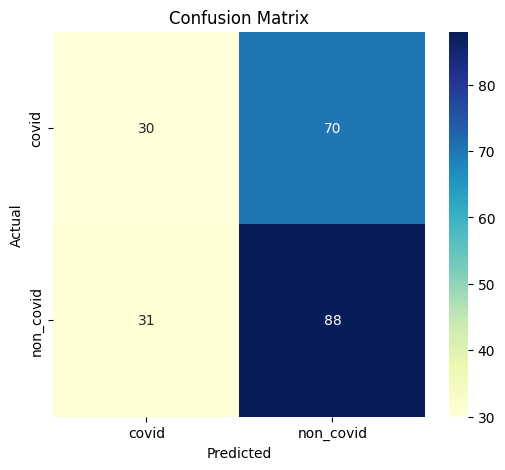

Classification Report:
              precision    recall  f1-score   support

       covid       0.49      0.30      0.37       100
   non_covid       0.56      0.74      0.64       119

    accuracy                           0.54       219
   macro avg       0.52      0.52      0.50       219
weighted avg       0.53      0.54      0.52       219



In [50]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict classes on the test set
predictions = model.predict(test_set, steps=len(test_set), verbose=1)
y_pred = np.argmax(predictions, axis=1)

# True labels
y_true = test_set.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
class_names = list(test_set.class_indices.keys())  # Get class names

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))



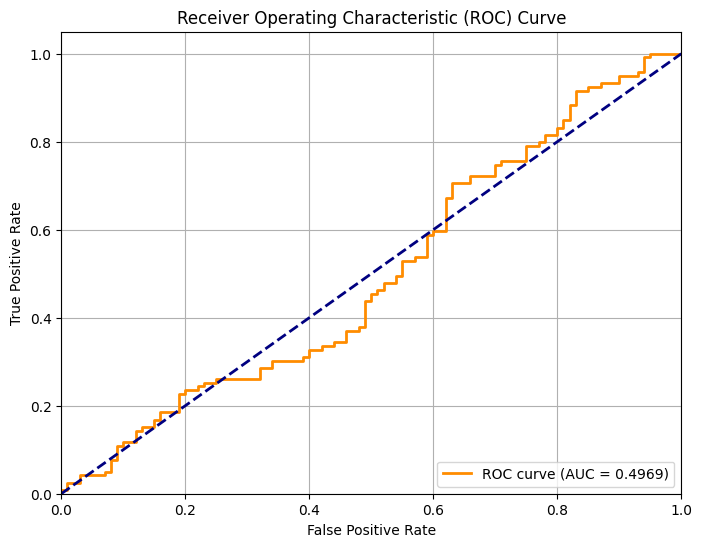

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1: No COVID)
y_score = predictions[:, 1]  # Probabilities for class 1
y_true = test_set.classes    # True binary labels (0: COVID, 1: No COVID)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
